## DSC630
## Week 3 solution 
## Abhishek Srivastava

## Using Data to Improve MLB Attendance

In this assignment, you will be using data on the Los Angeles Dodgers Major League Baseball (MLB) team located here: dodgers.csv. Use this data to make a recommendation to management on how to improve attendance. Tell a story with your analysis and clearly explain the steps you take to arrive at your conclusion. This is an open-ended question, and there is no one right answer. You are welcome to do additional research and/or use domain knowledge to assist your analysis, but clearly state any assumptions you make.


In [2]:
import pandas as pd

## 1. Load the data MLB and explore a few examples

In [3]:
df = pd.read_csv("dodgers-2022.csv")

In [4]:
df.shape

(81, 12)

In [5]:
#show random 9 rows
df.sample(9)

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
18,MAY,14,24312,Monday,Snakes,67,Clear,Night,NO,NO,NO,NO
11,APR,29,48753,Sunday,Nationals,74,Clear,Day,NO,YES,NO,NO
50,JUL,31,52832,Tuesday,Snakes,75,Cloudy,Night,NO,NO,NO,YES
12,MAY,7,43713,Monday,Giants,67,Clear,Night,NO,NO,NO,NO
57,AUG,8,37084,Wednesday,Rockies,84,Clear,Night,NO,NO,NO,NO
8,APR,25,26345,Wednesday,Braves,64,Cloudy,Night,NO,NO,NO,NO
9,APR,27,44807,Friday,Nationals,66,Clear,Night,NO,NO,YES,NO
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
48,JUL,18,39955,Wednesday,Phillies,80,Cloudy,Day,NO,NO,NO,NO


## 2. Systematically explore MLB attendance DataFrame, identify data issues, and begin discovering which factors may impact attendance.



In [6]:
# 1. Explore data structure and types
print(df.info())

print("="*30)

print(df.head())
print("="*30)

# 2. Check for missing values
print(df.isnull().sum())

# 3. Summary statistics for attendance
print(df['attend'].describe())
print("="*30)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        81 non-null     object
 1   day          81 non-null     int64 
 2   attend       81 non-null     int64 
 3   day_of_week  81 non-null     object
 4   opponent     81 non-null     object
 5   temp         81 non-null     int64 
 6   skies        81 non-null     object
 7   day_night    81 non-null     object
 8   cap          81 non-null     object
 9   shirt        81 non-null     object
 10  fireworks    81 non-null     object
 11  bobblehead   81 non-null     object
dtypes: int64(3), object(9)
memory usage: 7.7+ KB
None
  month  day  attend day_of_week opponent  temp   skies day_night cap shirt  \
0   APR   10   56000     Tuesday  Pirates    67  Clear        Day  NO    NO   
1   APR   11   29729   Wednesday  Pirates    58  Cloudy     Night  NO    NO   
2   APR   12   28328    Thursda

## 3. Analyze categorical variables' effects


In [7]:
# 4. Analyze categorical variables' effects
for col in ['day_of_week', 'opponent', 'skies', 'day_night', 'cap', 'shirt', 'fireworks', 'bobblehead']:
    print(f"\n=== {col.upper()} ===")
    print(df.groupby(col)['attend'].agg(['count', 'mean', 'std']).sort_values('mean', ascending=False))



=== DAY_OF_WEEK ===
             count          mean           std
day_of_week                                   
Tuesday         13  47741.230769   8291.390044
Saturday        13  43072.923077   6336.482298
Sunday          13  42268.846154   7596.350657
Thursday         5  40407.400000  12411.591328
Friday          13  40116.923077   4694.879400
Wednesday       12  37585.166667   8696.234889
Monday          12  34965.666667   7005.957949

=== OPPONENT ===
           count          mean           std
opponent                                    
Angels         3  49777.333333   5931.256893
Mets           4  49586.250000   4565.136681
Nationals      3  49267.333333   4738.481860
White Sox      3  46382.000000   6614.339272
Cubs           3  44206.666667   2127.087759
Padres         9  42092.222222   7431.611951
Phillies       3  41897.000000  10762.222029
Cardinals      7  40853.285714   2803.223187
Marlins        3  40665.333333   1101.663439
Reds           3  40649.000000  11194.05650

## 4. Visualize attendance by category (needs matplotlib/seaborn)


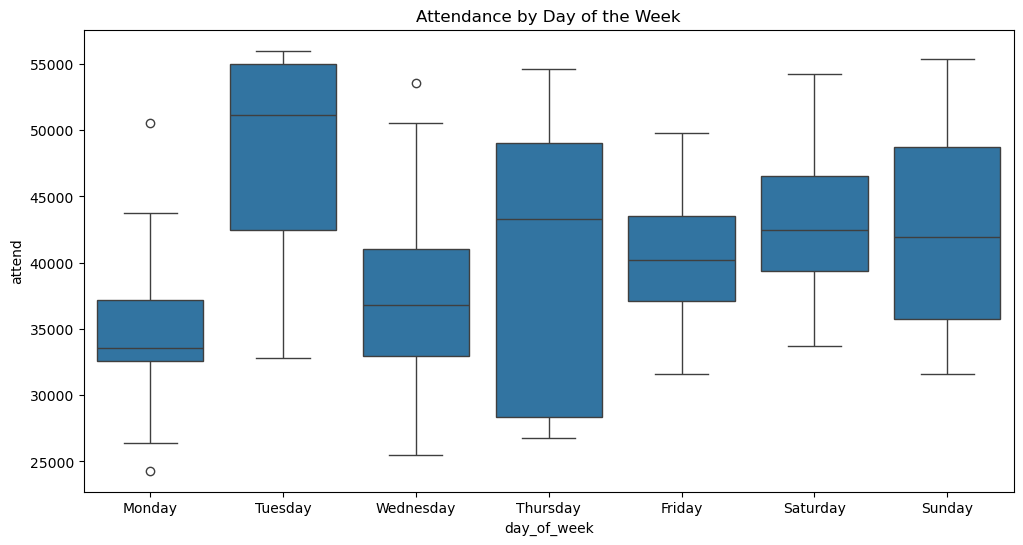

In [8]:
# 5. Visualize attendance by category (needs matplotlib/seaborn)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='day_of_week', y='attend', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Attendance by Day of the Week')
plt.show()


## 5a. Look for correlations between numeric variables (e.g., temperature and attendance)


          attend      temp
attend  1.000000  0.098951
temp    0.098951  1.000000


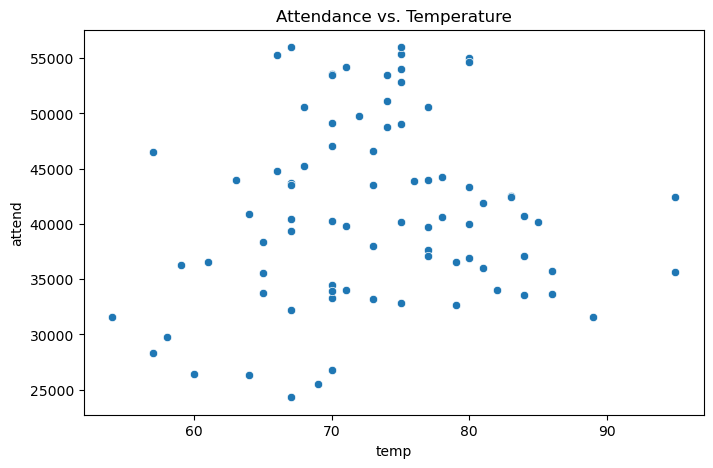

In [9]:
print(df[['attend', 'temp']].corr())

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='temp', y='attend')
plt.title('Attendance vs. Temperature')
plt.show()


## 5b. correlations between Attendance and categorical variables

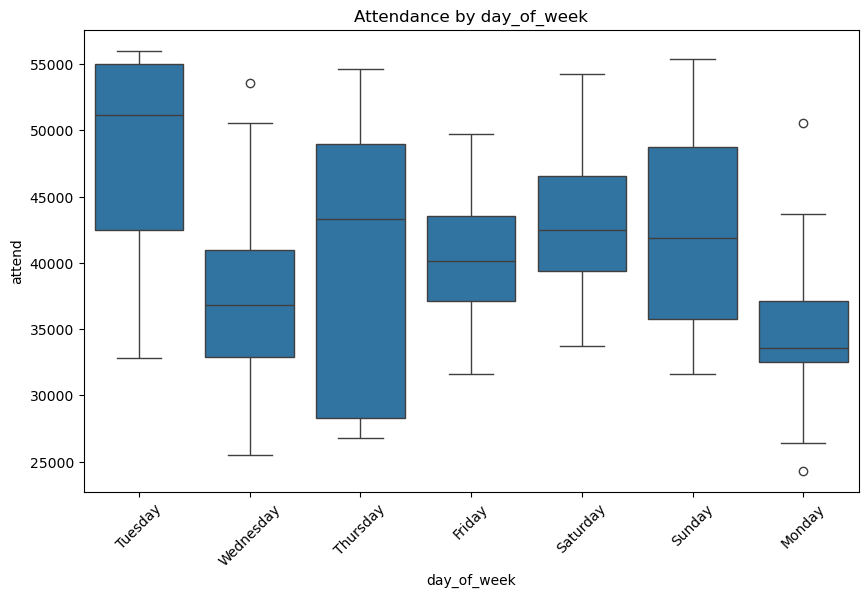

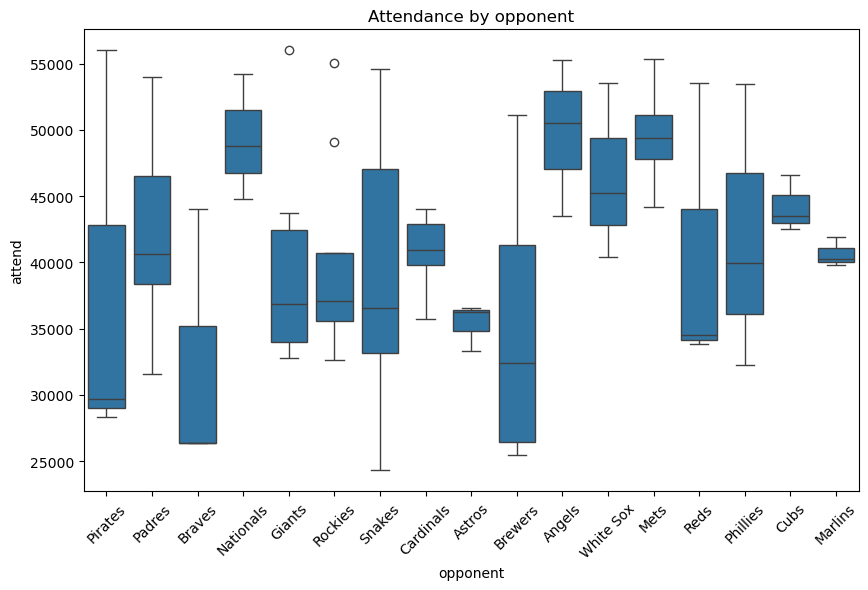

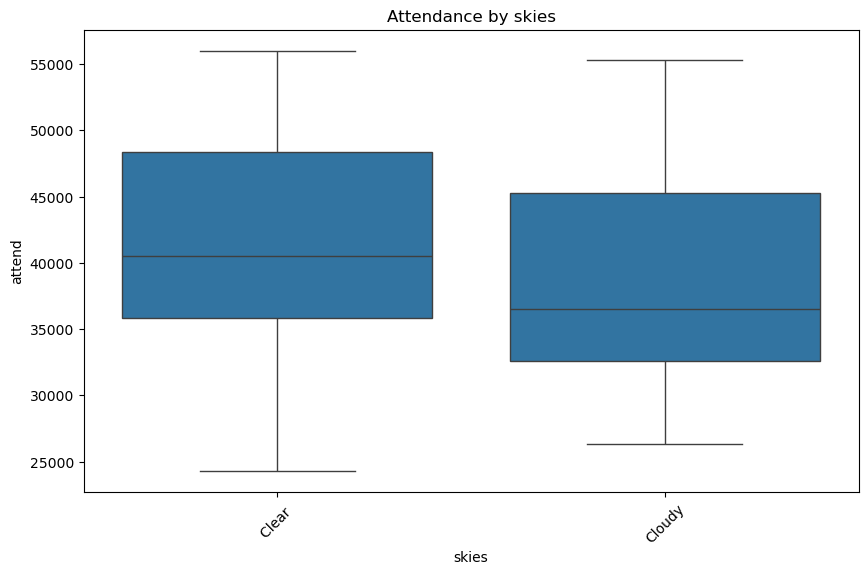

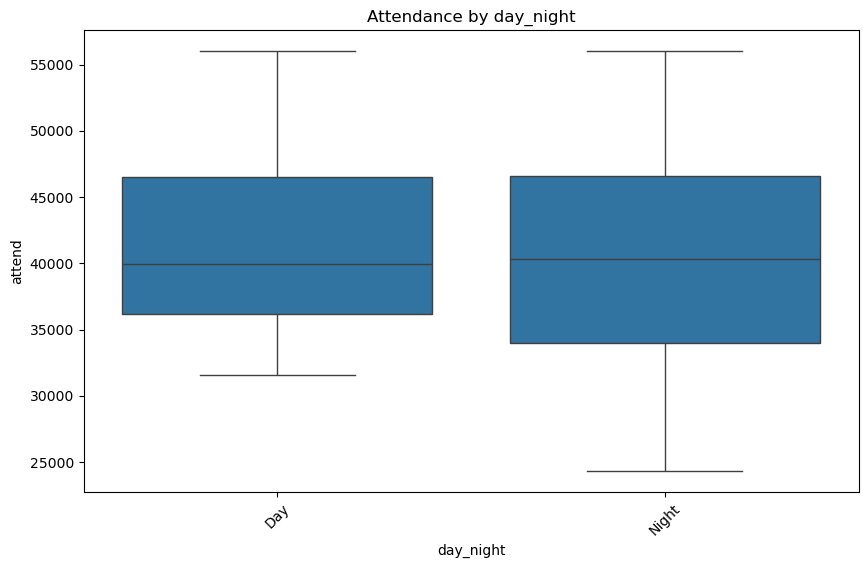

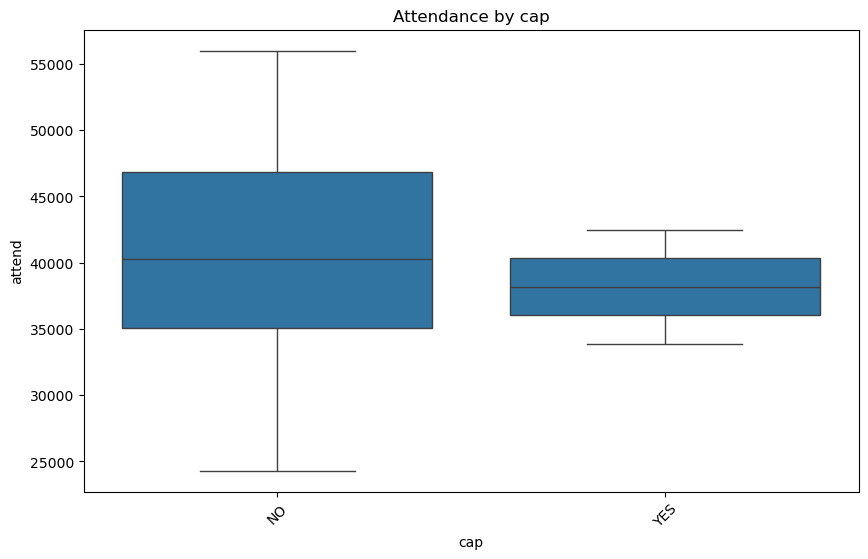

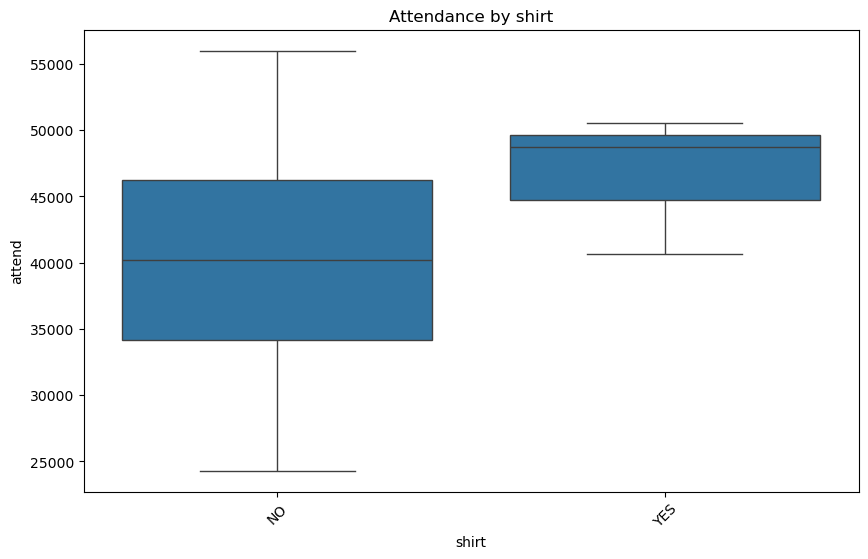

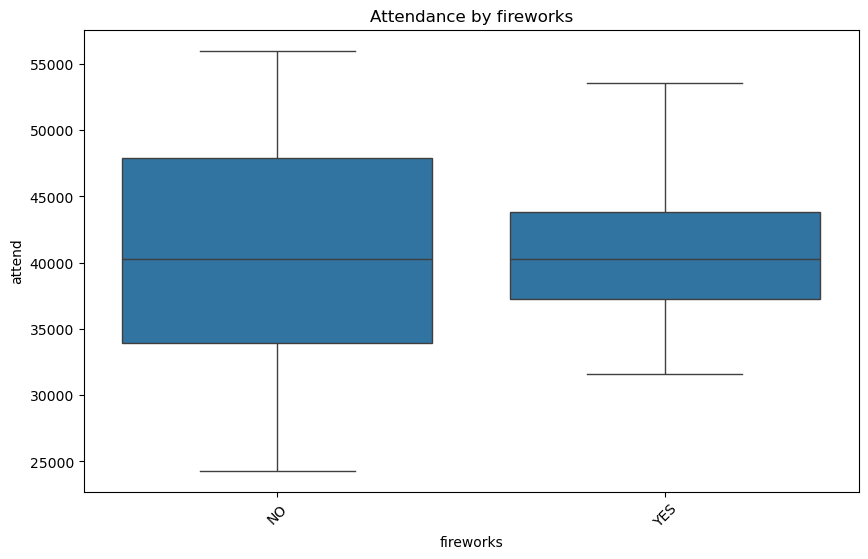

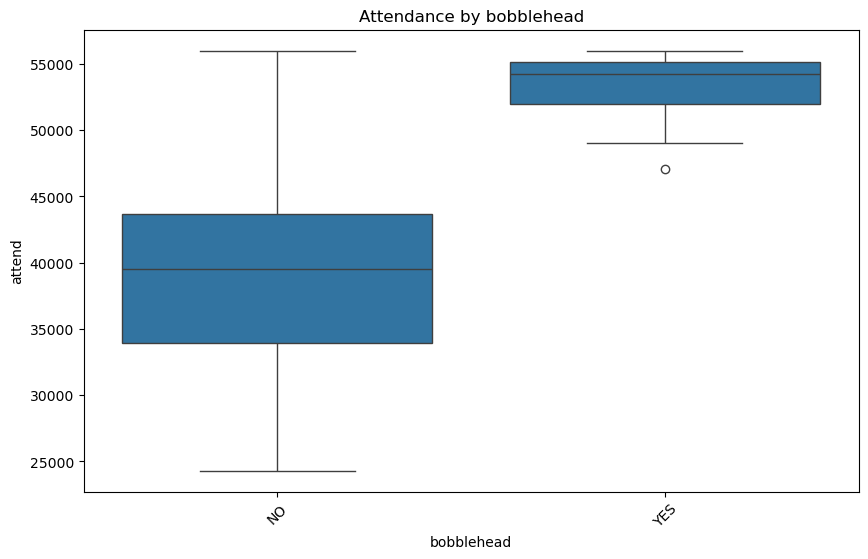

In [10]:
## correlations between Attendance and categorical variables
# scatter plots for categorical variables
categorical_vars = ['day_of_week', 'opponent', 'skies', 'day_night', 'cap', 'shirt', 'fireworks', 'bobblehead']
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=var, y='attend')
    # proper printing of x-axis labels
    plt.xticks(rotation=45)
    plt.title(f'Attendance by {var}')
    plt.show()

## 6. Analyze combinations (e.g., promotions and day/night)


In [11]:
print(pd.crosstab([df['day_night'], df['bobblehead']], df['attend'].apply(lambda x: 'High' if x > df['attend'].median() else 'Low')))


attend                High  Low
day_night bobblehead           
Day       NO             7    8
Night     NO            22   33
          YES           11    0


## 8. One-hot encode categorical variables for modeling


In [12]:
df_encoded = pd.get_dummies(df, columns=['day_of_week', 'opponent', 'skies', 'day_night', 'cap', 'shirt', 'fireworks', 'bobblehead'])


## 9  Performing linear regression on encoded MLB attendance DataFrame using scikit-learn. This will help discover which factors most impact attendance:

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# 1. Select features (X) and target (y)
X = df_encoded.drop(columns=['attend', 'month', 'day'])  # predictor variables
y = df_encoded['attend']  # attendance

# 2. Split the data into training and test sets (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predict and evaluate
y_pred = model.predict(X_test)
print("R^2 score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# 5. Show coefficients (impact of each feature)
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)
print(coef_df)


R^2 score: 0.2784547148359344
Mean Squared Error: 70943901.6909682
                  Feature   Coefficient
34          fireworks_YES   9404.563252
17     opponent_Nationals   7072.739095
6     day_of_week_Tuesday   6975.968121
8         opponent_Angels   6851.682883
36         bobblehead_YES   6210.774596
24     opponent_White Sox   5502.301151
13          opponent_Cubs   5484.414698
3    day_of_week_Saturday   3698.041199
16          opponent_Mets   3510.530061
4      day_of_week_Sunday   3394.041041
19      opponent_Phillies   2987.749139
29                 cap_NO   2877.363444
5    day_of_week_Thursday   1122.721072
7   day_of_week_Wednesday    743.916222
31               shirt_NO    267.509916
15       opponent_Marlins    260.388305
27          day_night_Day    205.356614
0                    temp    111.256757
25           skies_Clear      36.074794
26           skies_Cloudy    -36.074794
28        day_night_Night   -205.356614
12     opponent_Cardinals   -237.695733
32           


## Model Performance

- **R² score:** 0.28 – The model explains ~28% of the variation in attendance, which is low to moderate. There are likely impactful predictors not captured in this dataset, or some randomness/unmeasured factors.
- **Mean Squared Error:** About 70.9 million, meaning predictions can be off by several thousand fans. So, recommendations should focus on direction and relative impact, not exact numbers.

## Most Impactful Features (Coefficients)

### What Drives Attendance Up:
- **fireworks_YES** (+9,405): Fireworks nights provide the largest boost.
- **opponent_Nationals, opponent_Angels** (+7,073, +6,852): Certain opponents strongly increase attendance—possibly due to rivalry, star players, or weekend scheduling.
- **day_of_week_Tuesday** (+6,976): Surprisingly, Tuesday stands out as a strong attendance day in this data.
- **bobblehead_YES** (+6,211): Bobblehead giveaway nights significantly increase attendance, confirming industry research and observation.
- **opponent_White Sox, Cubs, Mets** (+5,502 to +3,510): Popular/high-profile opponents bring more fans.
- **day_of_week_Saturday, Sunday** (+3,698, +3,394): As expected, weekends draw larger crowds.
- **Other less-strong positive factors:** cap_NO, day_night_Day, temp, skies_Clear.

### What Decreases Attendance:
- **day_of_week_Friday** (-15,129): For your data, Fridays see much lower attendance—this could be a fluke, data entry issue, or reflect a real pattern for certain teams.
- **fireworks_NO, bobblehead_NO** (-9,405, -6,211): Absence of these promotions drops attendance.
- **Some opponents:** Pirates, Braves, Brewers, Astros show the lowest attendance draws.
- **cap_YES, shirt_YES** (caps, shirts) seem to lower or barely affect attendance.

## Recommendations:

1. **Increase Fireworks and Bobblehead Nights**
   - These promotions consistently draw several thousand extra fans—fireworks has the largest effect, followed closely by bobbleheads.
2. **Prioritize High-Profile Opponents for Promotions**
   - Run major promotions for games vs. Nationals, Angels, White Sox, Cubs, Mets, Phillies—historically high-attendance teams.
3. **Capitalize on Tuesdays and Weekends**
   - Tuesday stands out as a big draw; focus promotions on this day. Continue maximizing Saturday/Sunday games for bigger events.
4. **De-emphasize Caps/Shirts**
   - “Cap” and “shirt” promotions seem low-impact—reallocate budget/resources to high-impact items.
5. **Experiment with Fridays**
   - Since Friday currently looks poor for attendance, test targeted promotions or investigate underlying reasons for the drop.
6. **Weather, Time, and Minor Features**
   - “Clear” weather and “day” games have a slight positive effect. Use weather forecasts strategically when possible.
   - Monitor and adjust minor-feature promotions as trends shift.

**In conclusion:**  
Fireworks and bobbleheads are the top attendance boosters; combine these with popular opponents and schedule promotions on Tuesdays/weekends for best results. Avoid allocating resources to low-impact giveaways, and further investigate anomalies (like low Friday attendance).

